In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/BreastCancerChallenge/breast-cancer-wisconsin.txt')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Index                        15855 non-null  int64 
 1   ID                           15855 non-null  int64 
 2   Clump Thickness              15855 non-null  int64 
 3   Uniformity of Cell Size      15827 non-null  object
 4   Uniformity of Cell Shape     15827 non-null  object
 5   Marginal Adhesion            15827 non-null  object
 6   Single Epithelial Cell Size  15827 non-null  object
 7   Bare Nuclei                  15827 non-null  object
 8   Bland Chromatin              15827 non-null  object
 9   Normal Nucleoli              15827 non-null  object
 10  Mitoses                      15827 non-null  object
 11  Class                        15827 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.5+ MB


In [4]:
df.columns

Index(['Index', 'ID', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [5]:
df.head()

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4


In [6]:
df.isnull().sum()

Index                           0
ID                              0
Clump Thickness                 0
Uniformity of Cell Size        28
Uniformity of Cell Shape       28
Marginal Adhesion              28
Single Epithelial Cell Size    28
Bare Nuclei                    28
Bland Chromatin                28
Normal Nucleoli                28
Mitoses                        28
Class                          28
dtype: int64

In [7]:
for c in list(df.columns):
    n = df[c].unique()
    if len(n) < 50:
        print('columns:', c)
        print('category:', n)
        print(' ')
    else:
        print(' ')
        print(c + ':' + str(len(n)) + ' unique values')
        print(' ')

 
Index:15855 unique values
 
 
ID:666 unique values
 
columns: Clump Thickness
category: [  7   6   8   5  10   3   4   1  70  80 100   2   9  50  30  40  60]
 
columns: Uniformity of Cell Size
category: ['8' '10' '6' '5' '4' '9' '3' '1' 'No idea' '2' '7' '50' '100' '30' nan
 '#' '?' '80' '40' '60' '90' '20']
 
columns: Uniformity of Cell Shape
category: ['3' '5' '4' '6' '10' '7' '1' 'No idea' '2' '60' '100' '40' nan '#' '9'
 '8' '?' '30' '50' '70']
 
columns: Marginal Adhesion
category: ['7' '5' '10' '3' '6' '4' '1' '2' 'No idea' '30' '40' nan '#' '8' '?' '70'
 '60' '100' '50' '9' '20']
 
columns: Single Epithelial Cell Size
category: ['4' '10' '3' '6' '2' '8' 'No idea' '1' '30' nan '5' '#' '?' '40' '20' '7'
 '60' '80' '100' '9']
 
columns: Bare Nuclei
category: ['5' '10' '1' '8' '2' '3' '6' 'No idea' '?' '80' '60' '30' nan '100' '#'
 '9' '50' '7' '4' '20']
 
columns: Bland Chromatin
category: ['7' '6' '3' '2' '4' 'No idea' '1' '5' '70' '30' nan '40' '#' '10' '8' '?'
 '20' '9' '60' '

### Addressing Missing Values

In [8]:
print(df.isnull().sum())
print('\n',"Size of df:"+ str(len(df)))

Index                           0
ID                              0
Clump Thickness                 0
Uniformity of Cell Size        28
Uniformity of Cell Shape       28
Marginal Adhesion              28
Single Epithelial Cell Size    28
Bare Nuclei                    28
Bland Chromatin                28
Normal Nucleoli                28
Mitoses                        28
Class                          28
dtype: int64

 Size of df:15855


In [9]:
df = df.replace(['#', '?', 'No idea', 'nan'], np.nan)
df['Class'] = df['Class'].replace('40', '4')
df['Class'] = df['Class'].replace('20', '2')


In [10]:
#Drop Missing Values
features_columns = ['Clump Thickness',
                    'Uniformity of Cell Size', 
                    'Uniformity of Cell Shape', 
                    'Marginal Adhesion',
                   'Single Epithelial Cell Size',
                   'Bare Nuclei',
                   'Bland Chromatin',
                   'Normal Nucleoli',
                   'Mitoses'] 

In [11]:
df = df.dropna(subset=features_columns)

In [12]:
# Convert string to integer
for i in range(len(features_columns)):
    df[features_columns[i]] = df[features_columns[i]].astype(int)
df['Class'] = df['Class'].astype(int)

In [13]:
# As stated in the summary the range each variable is between 
# 1 and 10. Numbers that are multiple of 10 should be Divided by 10


id_list = []
for i in range(0, len(features_columns)):
    large_val = df[features_columns[i]]>11
    id_large_val = pd.array(df[large_val]['ID'])   
    id_list.append(id_large_val)

flat_IDlist = []
for subset in id_list:
    for item in subset:
        flat_IDlist.append(item)
#users_with_large_id = pd.array(flat_IDlist).unique()

subset_df = df.loc[df['ID'].isin(flat_IDlist)]

for feature in features_columns:
    subset_df[feature] = subset_df[feature].div(10)
df = df.loc[~df['ID'].isin(flat_IDlist)]
df = df.append(subset_df)

/opt/anaconda2/envs/HSD/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
subset_df

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
167,167,12266120,7.0,5.0,6.0,3.0,3.0,8.0,7.0,4.0,1.0,4
213,213,11122090,8.0,10.0,10.0,1.0,3.0,6.0,3.0,9.0,1.0,4
243,243,11690490,7.0,3.0,4.0,4.0,3.0,3.0,3.0,2.0,7.0,4
374,374,11986410,10.0,10.0,6.0,3.0,3.0,10.0,4.0,3.0,2.0,4
765,765,11690490,7.0,3.0,4.0,4.0,3.0,3.0,3.0,2.0,7.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
14984,14984,11105240,10.0,5.0,5.0,6.0,8.0,8.0,7.0,1.0,1.0,4
15196,15196,11112490,10.0,6.0,6.0,3.0,4.0,5.0,3.0,6.0,1.0,4
15479,15479,12266120,7.0,5.0,6.0,3.0,3.0,8.0,7.0,4.0,1.0,4
15528,15528,12410350,7.0,8.0,3.0,7.0,4.0,5.0,7.0,8.0,2.0,4


In [15]:
for c in list(df.columns):
    n = df[c].unique()
    if len(n) < 50:
        print('columns:', c)
        print('category:', n)
        print(' ')
    else:
        print(' ')
        print(c + ':' + str(len(n)) + ' unique values')
        print(' ')

 
Index:15760 unique values
 
 
ID:650 unique values
 
columns: Clump Thickness
category: [ 7.  6.  8.  5. 10.  3.  4.  1.  2.  9.]
 
columns: Uniformity of Cell Size
category: [ 8. 10.  6.  5.  4.  9.  3.  1.  2.  7.]
 
columns: Uniformity of Cell Shape
category: [ 3.  5.  4.  6. 10.  7.  1.  2.  9.  8.]
 
columns: Marginal Adhesion
category: [ 7.  5. 10.  3.  6.  4.  1.  2.  8.  9.]
 
columns: Single Epithelial Cell Size
category: [ 4. 10.  3.  6.  2.  8.  5.  1.  7.  9.]
 
columns: Bare Nuclei
category: [ 5. 10.  1.  8.  2.  3.  6.  9.  7.  4.]
 
columns: Bland Chromatin
category: [ 7.  6.  3.  2.  4.  1.  5. 10.  8.  9.]
 
columns: Normal Nucleoli
category: [ 8. 10.  5.  4.  3.  7.  2.  6.  9.  1.]
 
columns: Mitoses
category: [ 2.  1.  7.  3.  8.  6. 10.  4.  5.]
 
columns: Class
category: [4 2]
 


### Addressing Duplicates

In [16]:
df_nodup = df[~df.loc[:,'ID':'Class'].duplicated()]
print('\n',"Size after removing the duplicates:"+ str(len(df_nodup)))


 Size after removing the duplicates:694


In [17]:
print(df_nodup.isnull().sum())
print('\n',"Size of df:"+ str(len(df_nodup)))

Index                          0
ID                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

 Size of df:694


In [18]:
df_nodup['Class'].value_counts()

2    442
4    252
Name: Class, dtype: int64

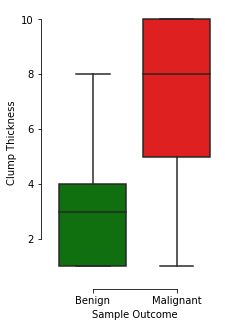

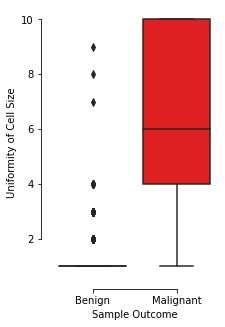

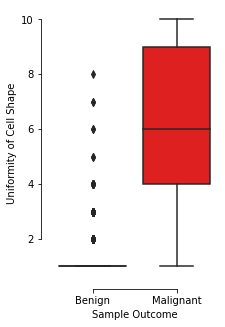

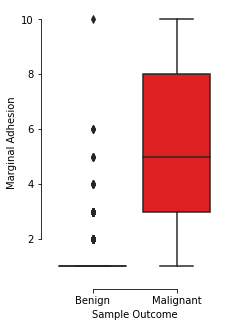

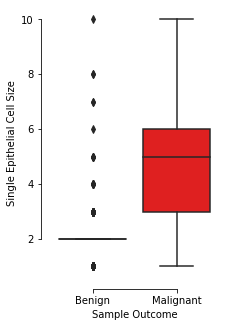

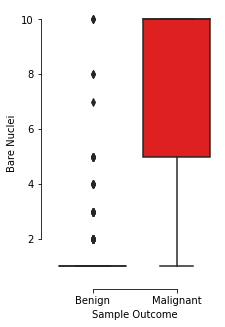

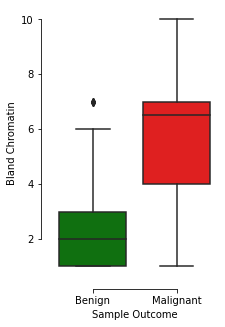

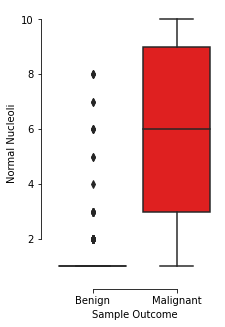

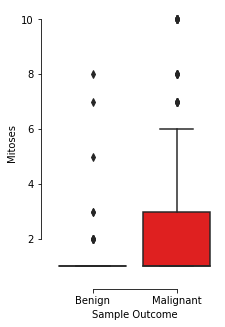

In [19]:
for i in range(0, len(features_columns)):
    plt.figure(figsize=(3,5))
    pal = {4: "red",  2: "green"}
    fig = sns.boxplot(x='Class', 
                      y=features_columns[i],
                      palette = pal,
                      data = df_nodup,
                     showfliers = True)
    plt.xlabel('Sample Outcome')
    plt.ylabel(features_columns[i])
    fig.set_xticklabels(['Benign', 'Malignant'], rotation = 90)
    sns.despine(offset=10, trim=True)
    plt.show()

### Addressing Outliers

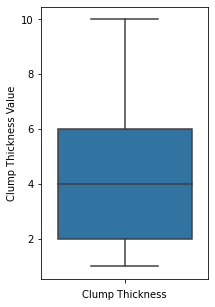

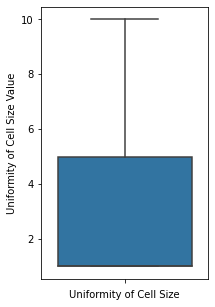

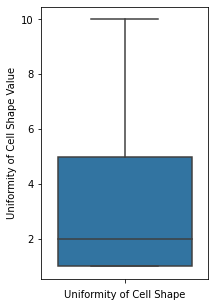

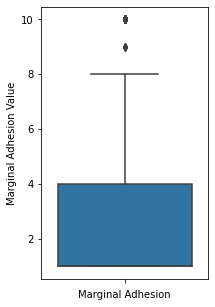

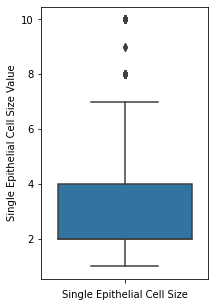

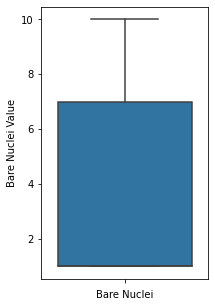

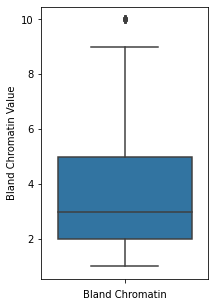

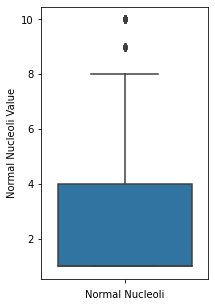

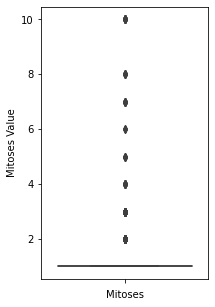

In [20]:
for i in range(0, len(features_columns)):
    plt.figure(figsize=(3,5))
    sns.boxplot(y=features_columns[i],
               data = df_nodup,
               showfliers=True)
    plt.xlabel(features_columns[i])
    plt.ylabel(str(features_columns[i] + ' Value'))
    plt.show()

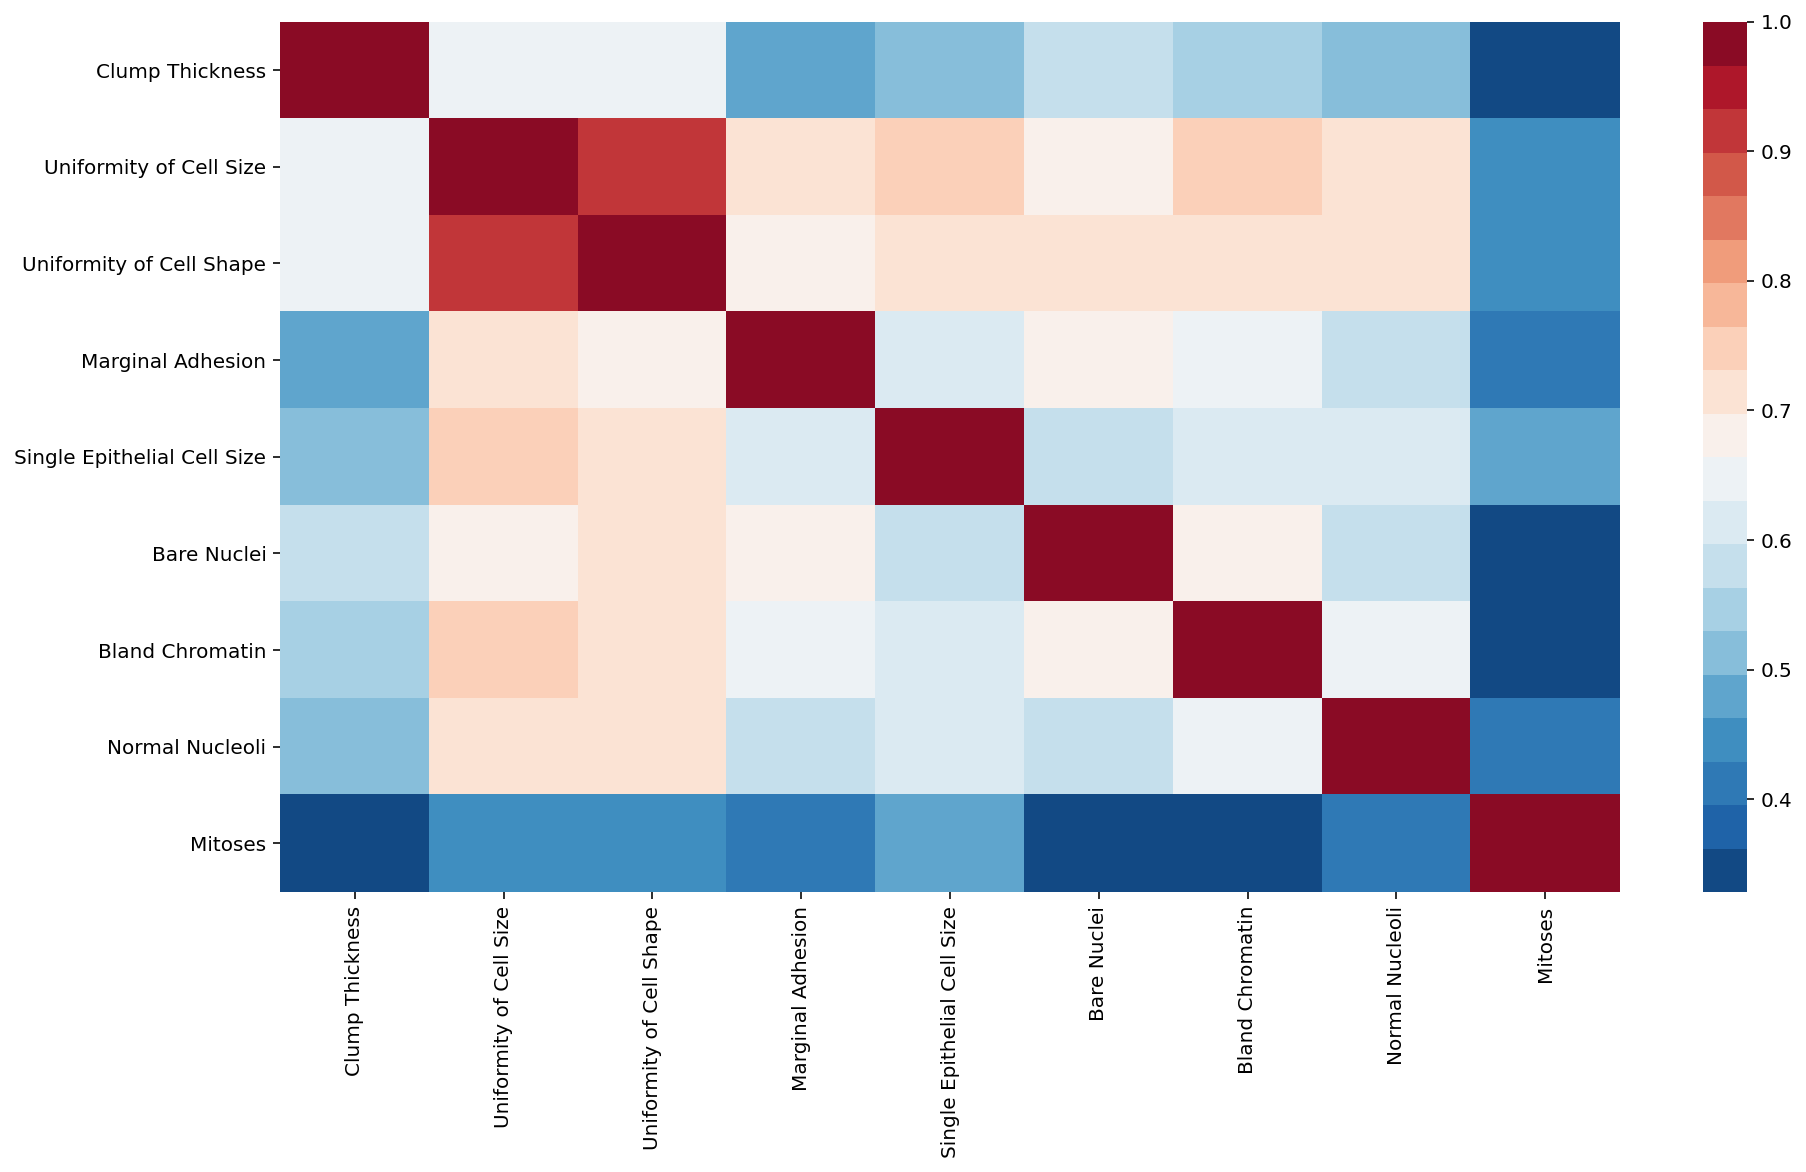

In [21]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# create correlation in dataframe
corr = df_nodup[df_nodup.columns[2:-1]].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 20));

In [22]:
#g = sns.PairGrid(df_nodup.loc[:, "Clump Thickness": "Mitoses"])
#g.map_diag(sns.kdeplot)
#g.map_offdiag(sns.kdeplot, n_levels=6);

/opt/anaconda2/envs/HSD/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda2/envs/HSD/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda2/envs/HSD/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda2/envs/HSD/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda2/envs/HSD/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda2/envs/HSD/lib/python3.6/site-pa

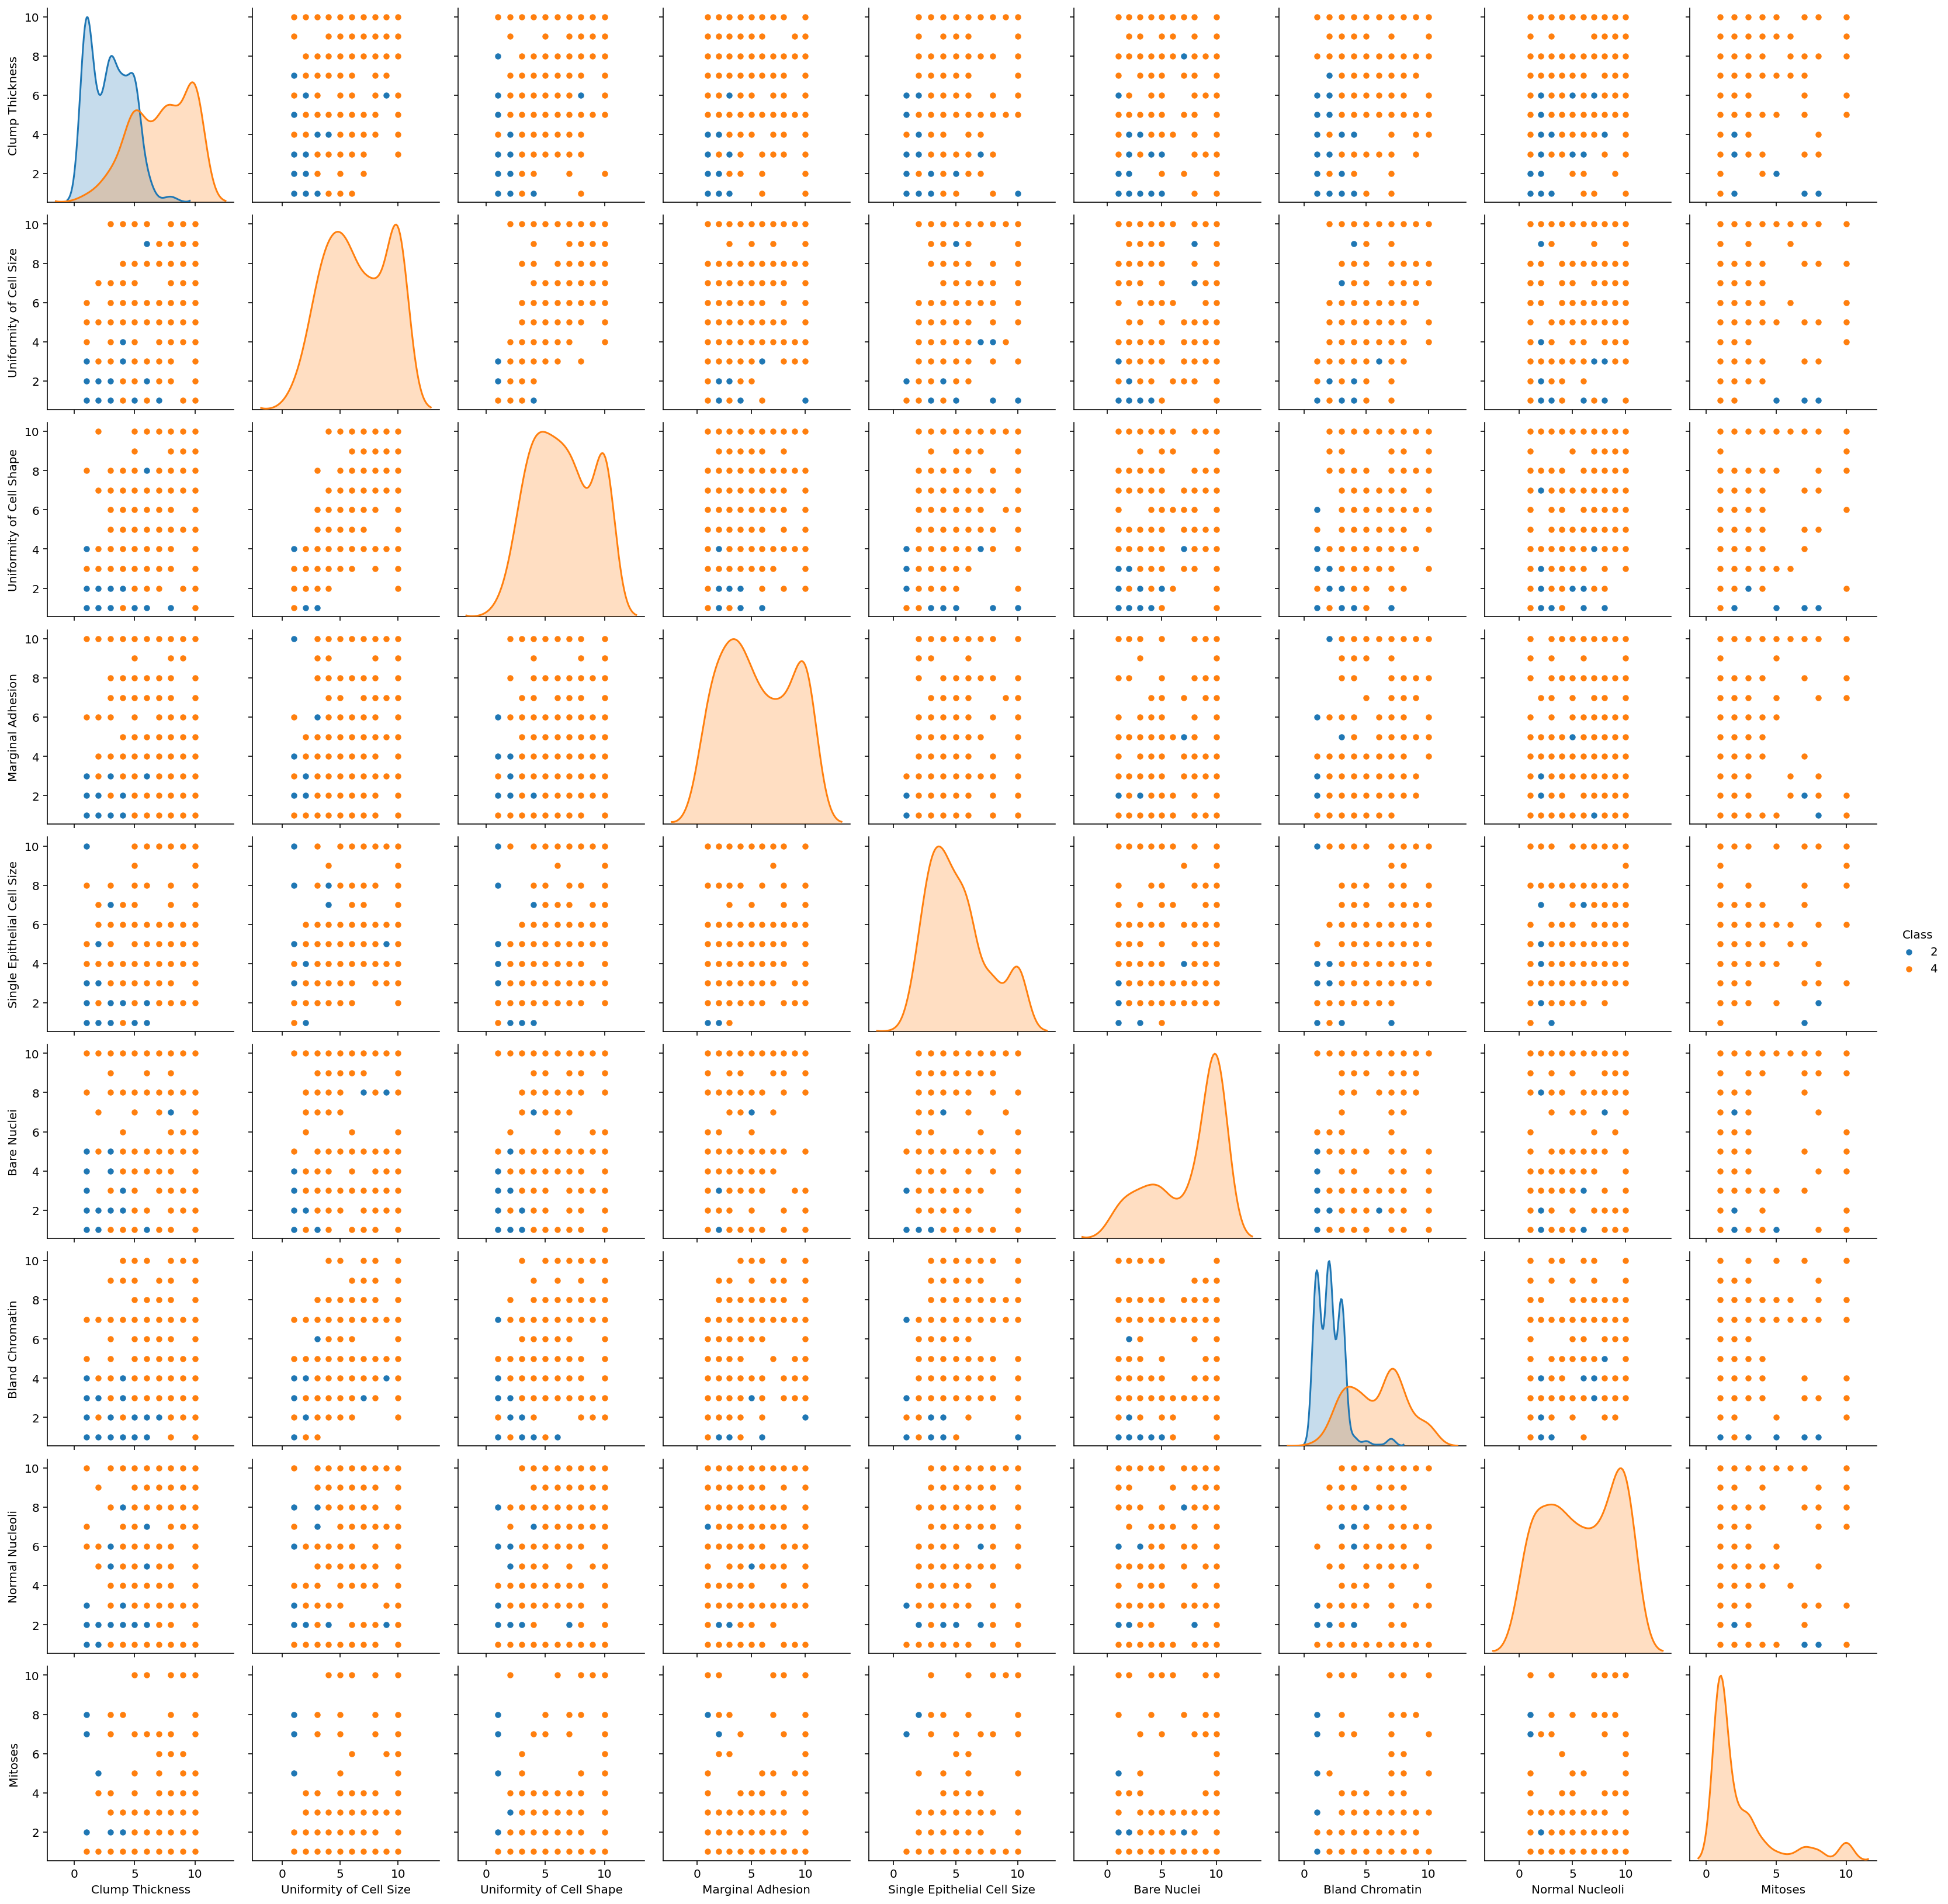

In [23]:
sns.pairplot(df_nodup.loc[:, "Clump Thickness": "Class"], hue="Class")

In [24]:
#sns.pairplot(df_nodup.loc[:, "Clump Thickness": "Mitoses"])


In [25]:
col2use = ['Clump Thickness',
                    'Uniformity of Cell Size', 
                    'Marginal Adhesion',
                   'Single Epithelial Cell Size',
                   'Bare Nuclei',
                   'Bland Chromatin',
                   'Normal Nucleoli',
                   'Mitoses']

In [26]:
df_data = df_nodup.copy()

In [27]:
df_data.groupby('Class').size()

Class
2    442
4    252
dtype: int64

In [28]:
df_data['output_label'] = (df_data['Class']==4).astype(int)

In [29]:
df_data.groupby('output_label').size()

output_label
0    442
1    252
dtype: int64

In [30]:
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

df_valid_test = df_data.sample(frac=0.30, random_state=42)
df_test = df_valid_test.sample(frac=0.5, random_state=42)
df_valid = df_valid_test.drop(df_test.index)


In [31]:
df_train_all = df_data.drop(df_valid_test.index)

In [32]:
print('Train prevalence (n = %d):' %len(df_train_all), df_train_all.output_label.sum()/len(df_train_all))
print('Valid prevalence (n = %d):' %len(df_valid), df_valid.output_label.sum()/len(df_valid))
print('Test prevalence (n = %d):' %len(df_test), df_test.output_label.sum()/len(df_test))

Train prevalence (n = 486): 0.37037037037037035
Valid prevalence (n = 104): 0.40384615384615385
Test prevalence (n = 104): 0.28846153846153844


In [33]:
positive_label = df_train_all.output_label==1
df_train_pos = df_train_all.loc[positive_label]
df_train_neg = df_train_all.loc[~positive_label]

In [34]:
df_train = pd.concat([df_train_pos, df_train_neg.sample(n=len(df_train_pos), random_state=42)], axis=0)
df_train = df_train.sample(n=len(df_train), random_state=42).reset_index(drop=True)

In [35]:
print('Train prevalence (n = %d):' %len(df_train), df_train.output_label.sum()/len(df_train))

Train prevalence (n = 360): 0.5


In [36]:
X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train.output_label.values
y_valid = df_valid.output_label.values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (486, 8)
Training shapes: (360, 8) (360,)
Validation shapes: (104, 8) (104,)


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train_all)

MinMaxScaler()

In [38]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [39]:
scaler = pickle.load(open(scalerfile, 'rb'))

In [40]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

# feature extraction
test = SelectKBest(score_func=f_classif, k=8)
fit = test.fit(X_train_tf, y_train)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
X_train_tf = fit.transform(X_train_tf)
X_valid_tf = fit.transform(X_valid_tf)
# summarize selected features
print(X_train_tf[0:8,:])

[381.439 709.387 311.898 290.373 655.962 453.14  342.512  64.687]
[[0.222 0.    0.    0.111 0.    0.111 0.222 0.   ]
 [0.556 1.    0.667 0.556 0.333 0.778 1.    0.111]
 [0.222 0.111 0.    0.111 0.    0.111 0.111 0.   ]
 [0.111 0.222 0.    0.222 0.    0.    0.    0.   ]
 [0.444 1.    0.    1.    0.333 0.333 1.    1.   ]
 [0.222 0.    0.    0.111 0.    0.111 0.    0.   ]
 [0.778 0.556 1.    1.    0.    0.222 0.444 0.   ]
 [0.778 0.333 0.    0.111 0.889 0.222 0.222 0.   ]]


In [42]:
from sklearn.metrics import roc_auc_score,accuracy_score, precision_score, recall_score

def calc_specificity(y_true, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_true == 0)) /sum(y_true ==0)

def calc_prevalence(y_true):
    return (sum(y_true)/len(y_true))

def print_report(y_true, y_pred, thresh):
    auc = roc_auc_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, (y_pred > thresh))
    recall = recall_score(y_true, (y_pred > thresh))
    precision = precision_score(y_true, (y_pred > thresh))
    specificity = calc_specificity(y_true, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_true))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train_tf, y_train)

In [44]:
y_train_pred = lr.predict_proba(X_train_tf)[:,1]
y_valid_pred = lr.predict_proba(X_valid_tf)[:,1]

threshold =0.3
print('Logistic Regression')
print('training:')
lr_train_auc, lr_train_accuracy, lr_train_recall,\
lr_train_precision, lr_train_specificity=print_report(y_train, y_train_pred, threshold)

print(' ')
print('validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall,\
lr_valid_precision, lr_valid_specificity=print_report(y_valid, y_valid_pred, threshold)

Logistic Regression
training:
AUC:0.998
accuracy:0.989
recall:0.994
precision:0.984
specificity:0.983
prevalence:0.500
 
 
validation:
AUC:0.999
accuracy:0.990
recall:1.000
precision:0.977
specificity:0.984
prevalence:0.404
 


In [45]:
lr.coef_[0]

array([2.369, 2.638, 1.494, 1.253, 2.831, 1.603, 1.711, 0.924])

In [46]:
#feature_importances = pd.DataFrame(lr.coef_[0],
#    columns=['importance']).sort_values('importance',ascending=False)
                                                                       

In [47]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

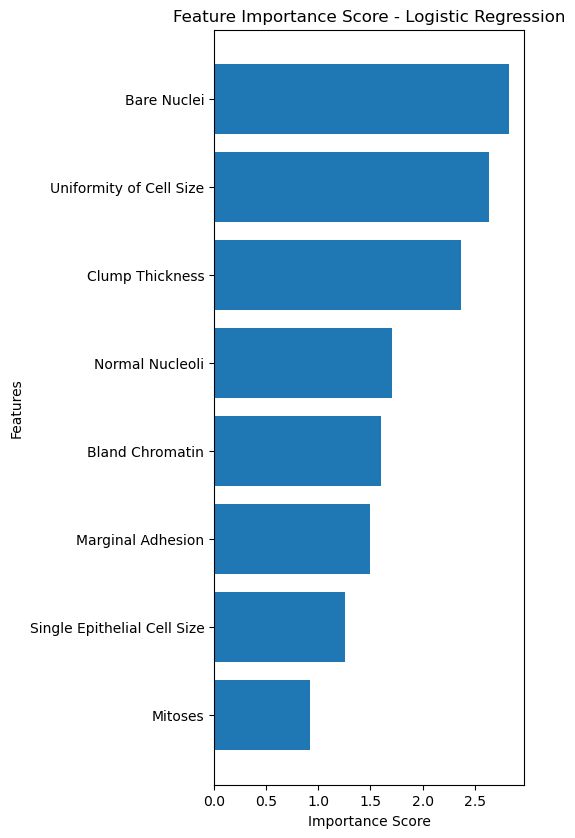

In [48]:
num = 8
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(4, 10), dpi=50, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

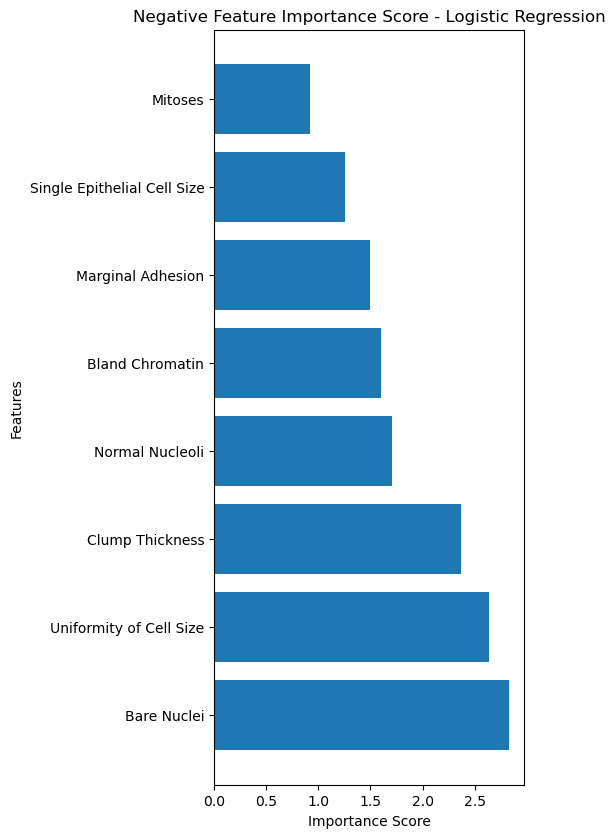

In [49]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(4, 10), dpi=50, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

In [50]:
X_test = df_test[col2use].values
y_test = df_test['output_label'].values

scaler = pickle.load(open('scaler.sav', 'rb'))
X_test_tf = scaler.transform(X_test)

In [51]:
best_model = lr

In [52]:
y_train_pred = lr.predict_proba(X_train_tf)[:,1]
y_valid_pred = lr.predict_proba(X_valid_tf)[:,1]
y_test_pred = lr.predict_proba(X_test_tf)[:,1]

In [53]:
threshold = 0.5
print('training:')
train_auc, train_accuracy, train_recall,\
train_precision, train_specificity=print_report(y_train, y_train_pred, threshold)

print(' ')
print('validation:')
valid_auc, valid_accuracy, valid_recall,\
valid_precision, valid_specificity=print_report(y_valid, y_valid_pred, threshold)

print(' ')
print('test:')
test_auc, test_accuracy, test_recall,\
test_precision, test_specificity=print_report(y_test, y_test_pred, threshold)

training:
AUC:0.998
accuracy:0.981
recall:0.972
precision:0.989
specificity:0.989
prevalence:0.500
 
 
validation:
AUC:0.999
accuracy:0.971
recall:0.929
precision:1.000
specificity:1.000
prevalence:0.404
 
 
test:
AUC:0.987
accuracy:0.981
recall:1.000
precision:0.938
specificity:0.973
prevalence:0.288
 


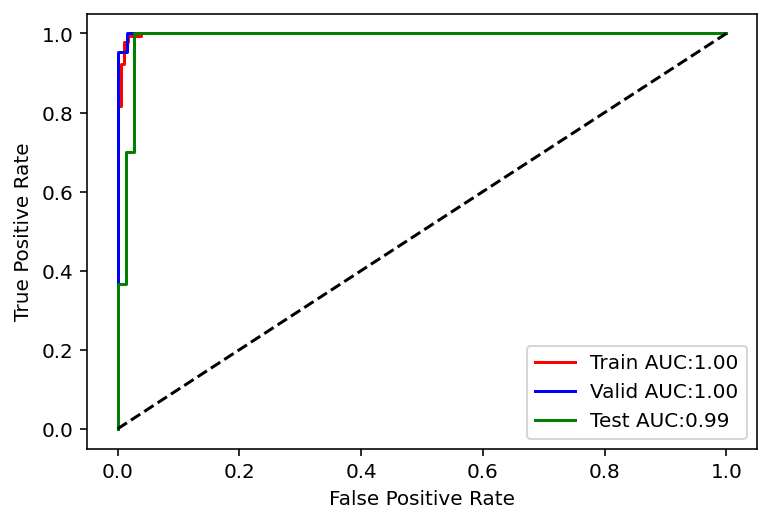

In [54]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, y_train_pred)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_pred)
auc_valid = roc_auc_score(y_valid, y_valid_pred)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, y_test_pred)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.2f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.2f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.2f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()